In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
credit = pd.read_csv("../Data/Credit.csv")
credit['Income'] = pd.to_numeric(credit['Income'])

In [3]:
model =smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data=credit).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.46e-248
Time:                        15:09:17   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([14., 46., 73., 82., 65., 50., 34., 17., 14.,  5.]),
 array([-204.86409664, -154.71692478, -104.56975291,  -54.42258105,
          -4.27540918,   45.87176268,   96.01893455,  146.16610641,
         196.31327828,  246.46045014,  296.60762201]),
 <BarContainer object of 10 artists>)

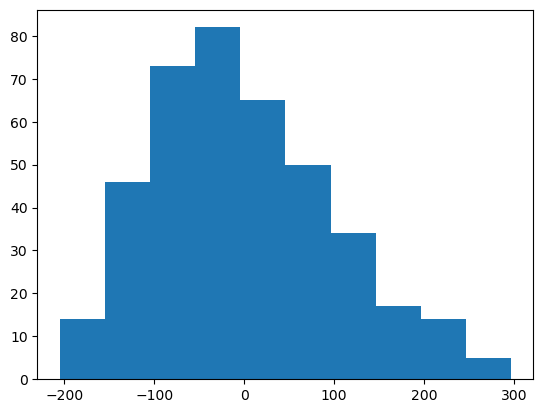

In [4]:
#histogram of residual to observe the shape/skewness
plt.hist(model.resid)

#### Slightly right skewed ... also visible in QQ plot:

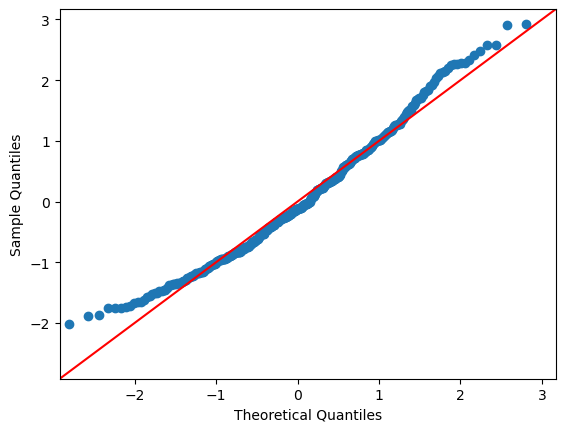

In [6]:
#QQ plot
sm.qqplot(model.resid/np.std(model.resid),  line = '45');

In [7]:
### If you need a test/pval to assess Normality, you can run the Kolmogorov-Smirnov test ... I never use this though lol.
### Most of the time it's enough to just look at the resids and make a visual argument. 

In [8]:
from scipy.stats import kstest
kstest(model.resid,'norm')

KstestResult(statistic=0.5445911171192748, pvalue=9.875941873420867e-112, statistic_location=-3.346710462077965, statistic_sign=1)

In [9]:
credit['log_balance_1']=np.log(credit['Balance']+1) #add 1 to avoid log(0) 
model_1 =smf.ols('log_balance_1 ~ Income + Rating + Cards + Age + \
                    Education + Gender + Student + Married + Ethnicity',data=credit).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_balance_1   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          6.57e-113
Time:                        15:09:17   Log-Likelihood:                -684.79
No. Observations:                 400   AIC:                             1392.
Df Residuals:                     389   BIC:                             1435.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5554      0.464     -1.198      0.232      -1.467       0.356
Gender[T.Female]           0.0621      0.136      0.455      0.649      -0.206       0.330
Student[T.Yes]             1.8213      0.229      7.952      0.000       1.371       2.272
Married[T.Yes]             0.0793      0.142      0.560      0.576      -0.199       0.358
Ethnicity[T.Asian]        -0.1013      0.194     -0.523      0.602      -0.483       0.280
Ethnicity[T.Caucasian]     0.1867      0.168      1.111      0.267      -0.144       0.517
Income                    -0.0539      0.003    -16.743      0.000      -0.060      -0.048
Rating                     0.0226      0.001     31.134      0.000       0.021       0.024
Cards                     -0.0287      0.050     -0.573      0.567      -0.127       0.070
Age                       -0.0034      0.004     -0.841      0.401      -0.011       0.005
Education                 -0.0200      0.022     -0.912      0.362      -0.063       0.023
==============================================================================
Omnibus:                       67.817   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.355
Skew:                          -0.379   Prob(JB):                     5.14e-06
Kurtosis:                       2.059   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### After transformation: not so skewed anymore but not exactly Normal either... 


(array([ 1., 14., 31., 33., 59., 41., 47., 77., 75., 22.]),
 array([-3.68424435, -3.07964034, -2.47503634, -1.87043234, -1.26582834,
        -0.66122434, -0.05662034,  0.54798367,  1.15258767,  1.75719167,
         2.36179567]),
 <BarContainer object of 10 artists>)

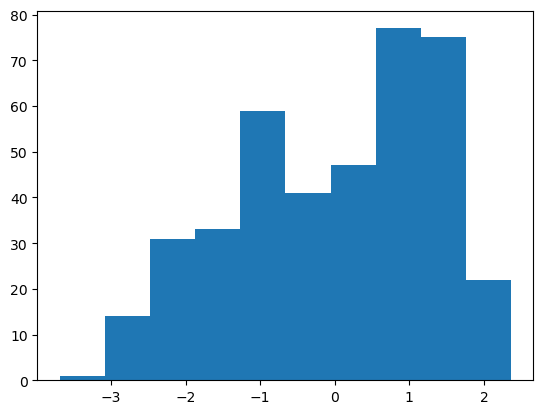

In [45]:
#histogram of residuals after transofrmation
plt.hist(model_1.resid)

### Light tailed QQ plot… So we are at least not anti-conservative!

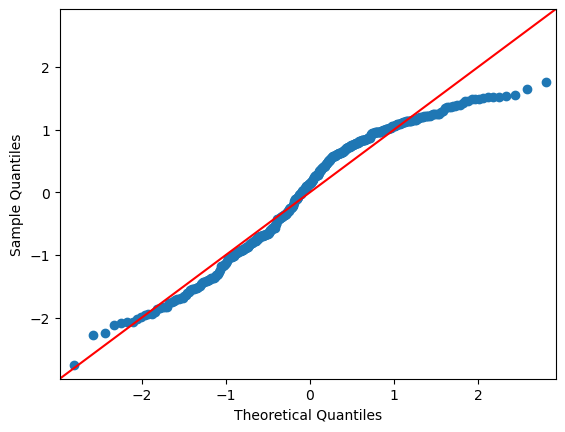

In [47]:
sm.qqplot(model_1.resid/np.std(model_1.resid),  line = '45');

## Check for nonlinearity beween y and x

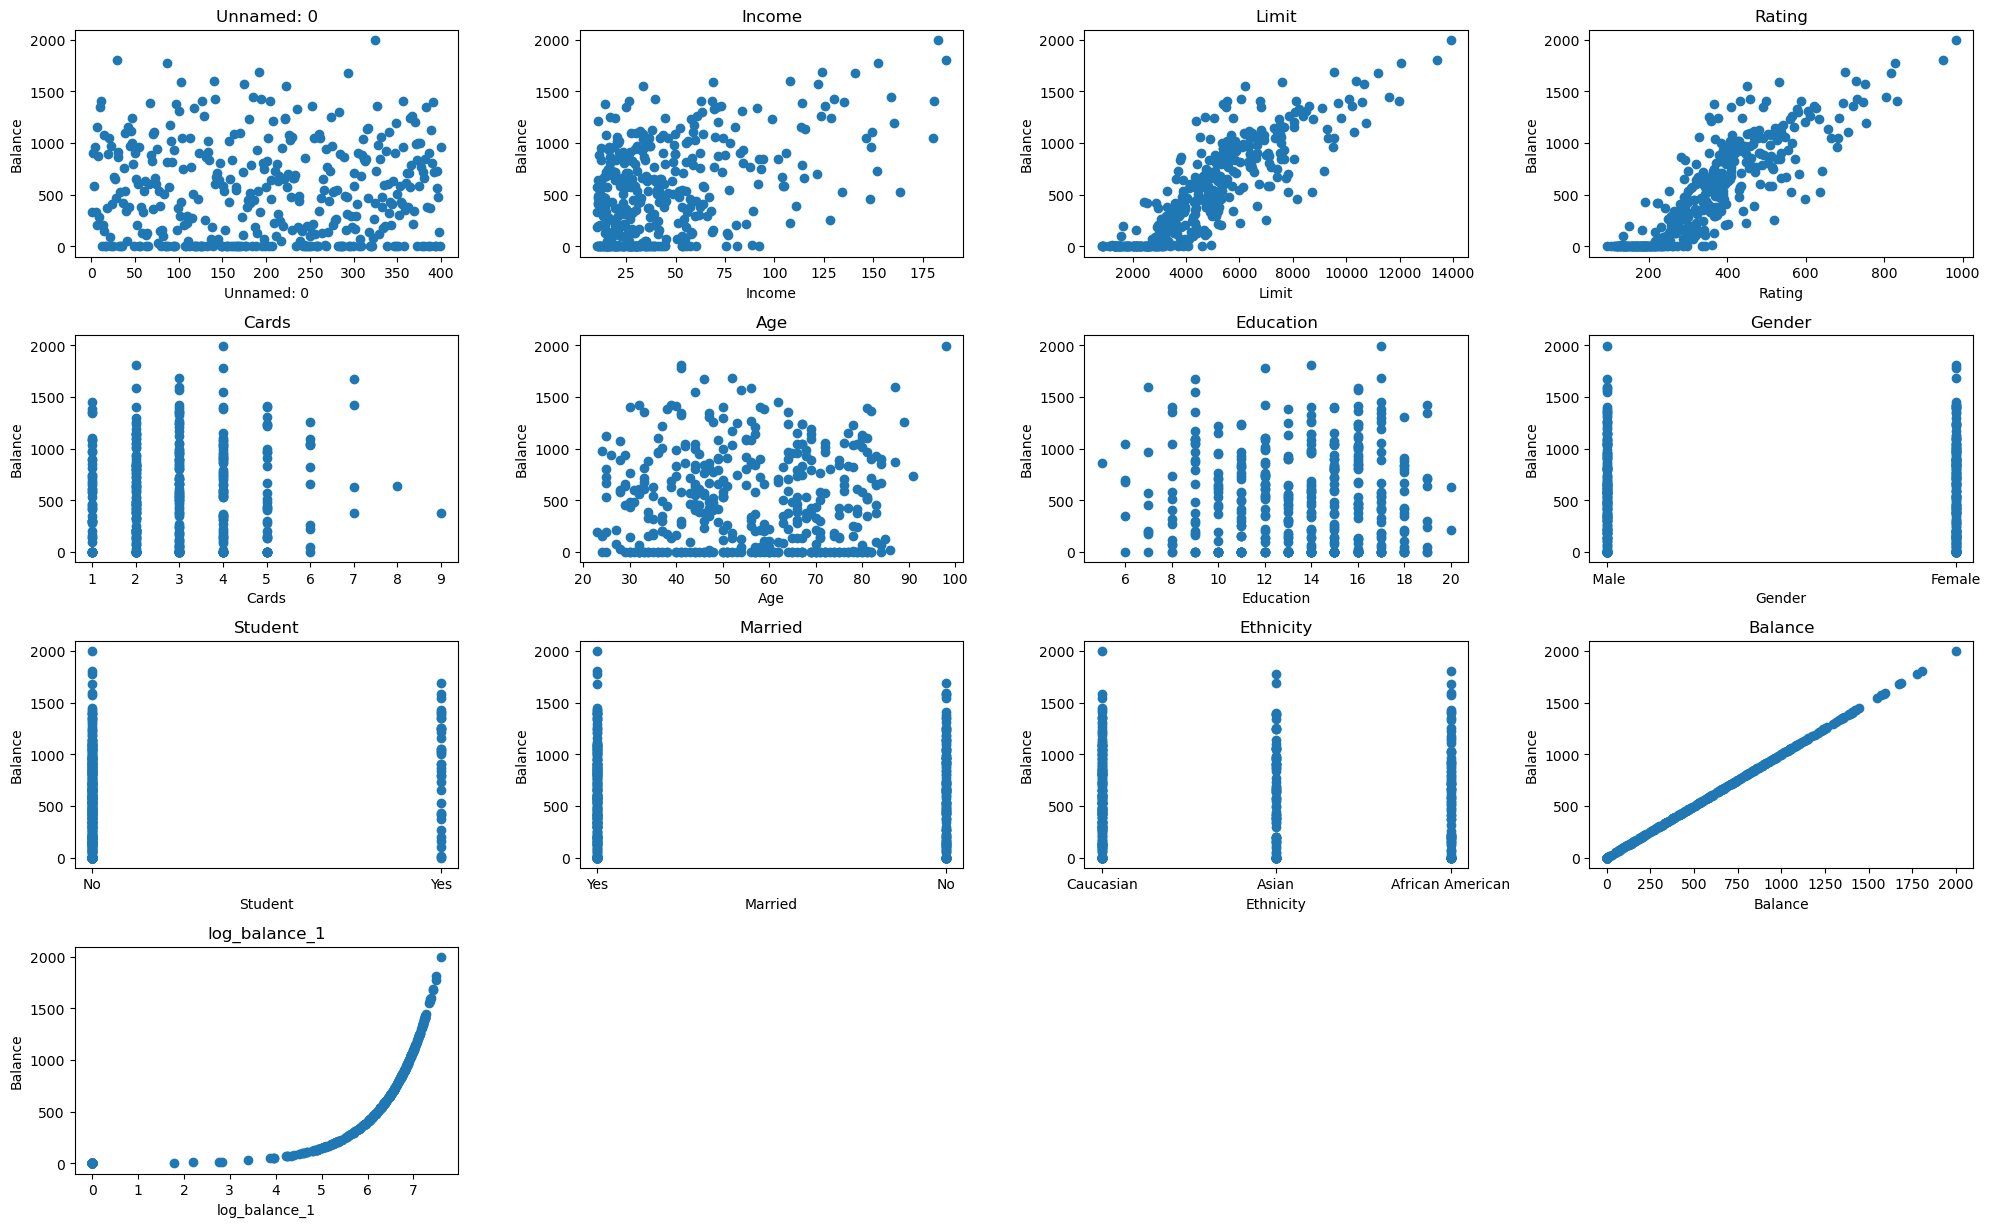

In [11]:
#pair-wise scatter plot between y and predictors
plt.figure(figsize=(20, 15))


# i: index
for i, col in enumerate(credit.columns):
    plt.subplot(5, 4, i+1)
    x = credit[col]
    y = credit['Balance']
    plt.plot(x, y, 'o')
    plt.tight_layout()

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Balance')
    # looks okay: maybe limit and rating?

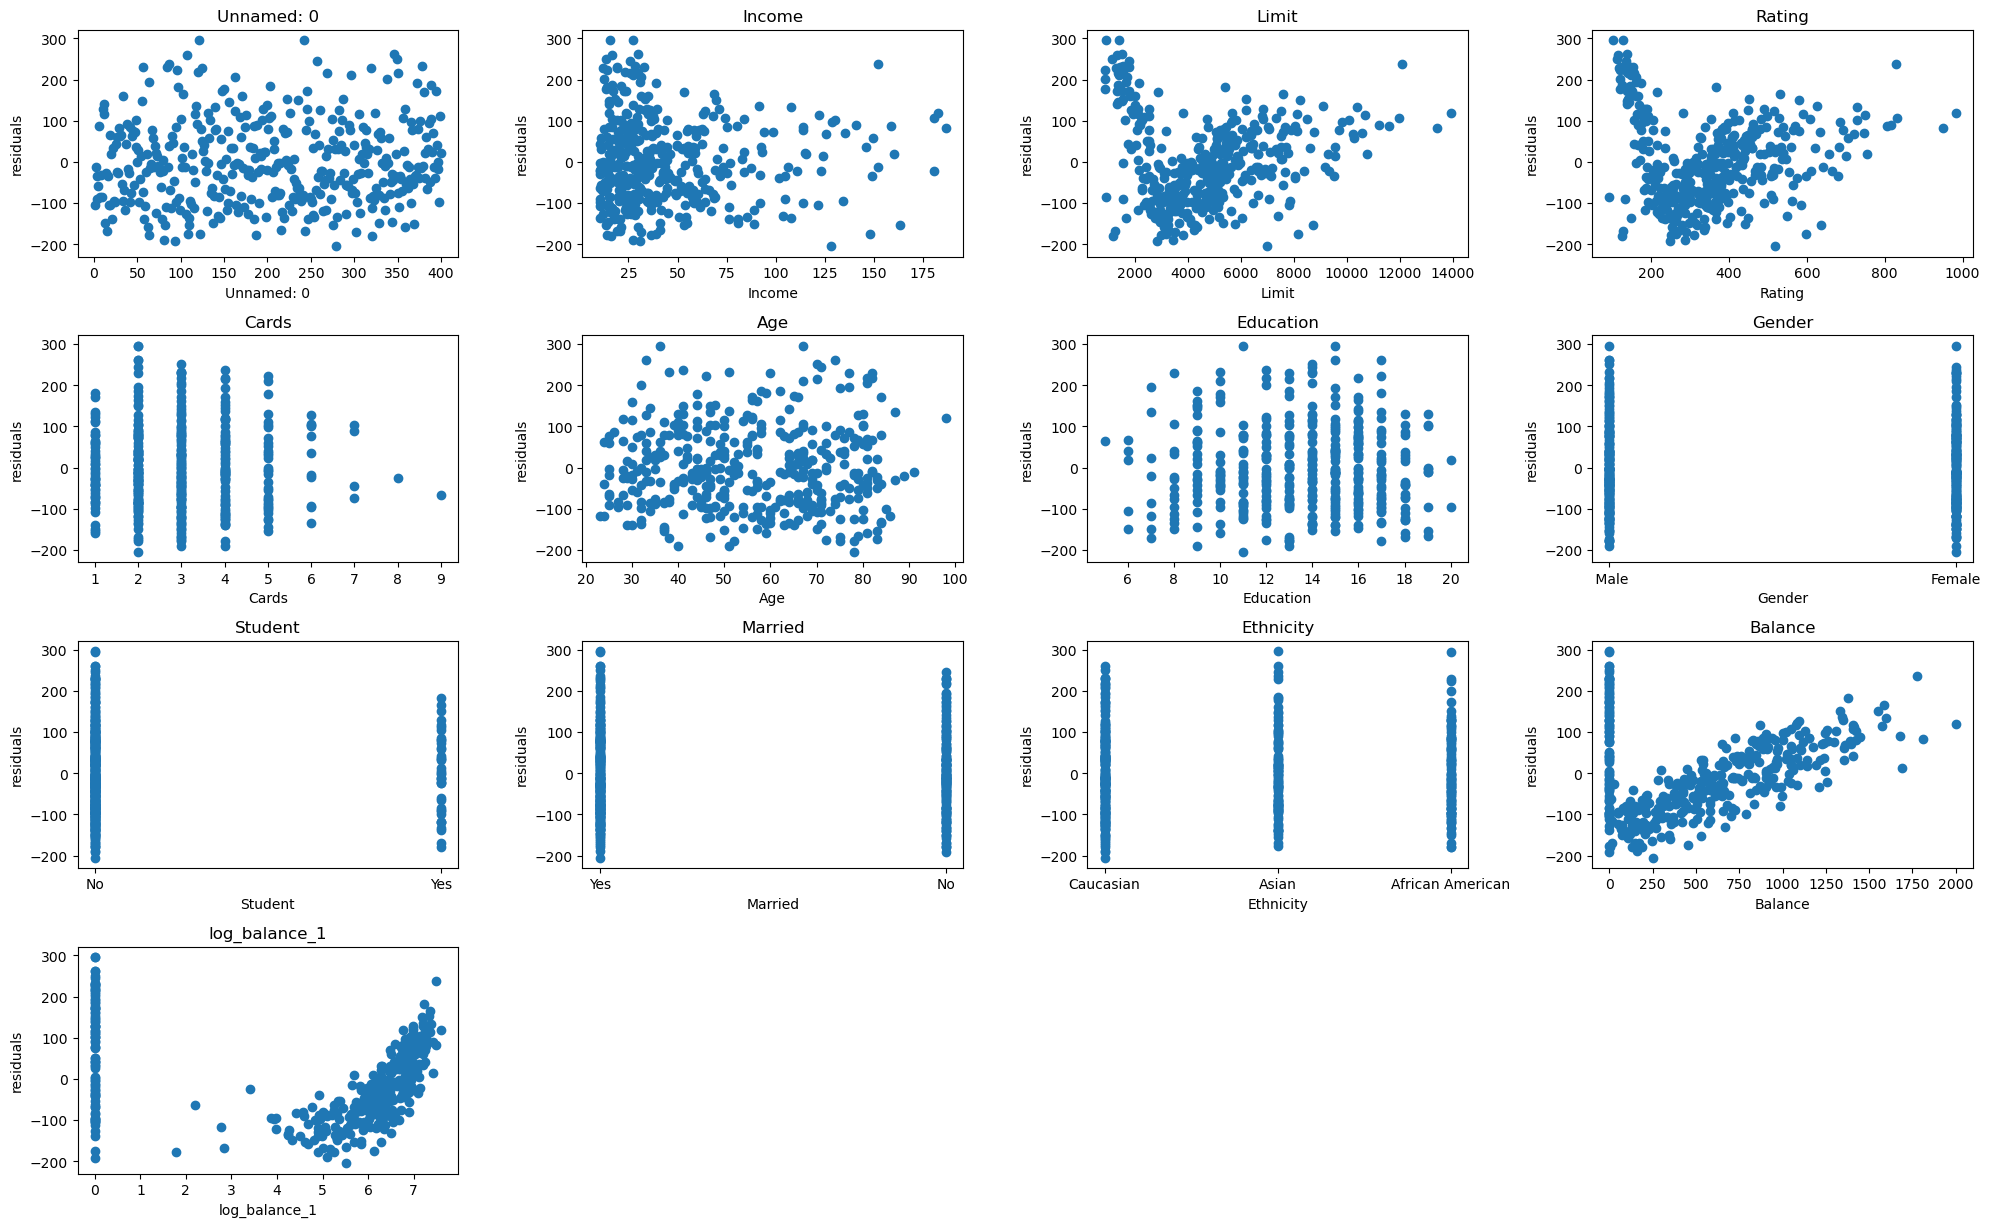

In [12]:
#residual plot might have suggestions too
#pair-wise scatter plot between residuals and predictors
plt.figure(figsize=(20, 15))


# i: index
for i, col in enumerate(credit.columns):
    plt.subplot(5, 4, i+1)
    x = credit[col]
    y = model.resid**2
    plt.plot(x, y, 'o')
    plt.tight_layout()

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('residuals')


In [13]:
credit['log_rating']=np.log(credit['Rating'])
credit['log_income']=np.log(credit['Income'])

In [14]:
model_2 =smf.ols('log_balance_1~log_income + log_rating + Cards + Age + Education \
                    + Gender + Student + Married + Ethnicity', data=credit).fit()
model_2.summary()
# with the same number of predictors, R^2 improved

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_balance_1   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.36e-143
Time:                        15:09:19   Log-Likelihood:                -611.76
No. Observations:                 400   AIC:                             1246.
Df Residuals:                     389   BIC:                             1289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -27.7589      0.845    -32.867      0.000     -29.419     -26.098
Gender[T.Female]           0.0670      0.114      0.590      0.556      -0.156       0.290
Student[T.Yes]             1.7858      0.191      9.362      0.000       1.411       2.161
Married[T.Yes]             0.0416      0.118      0.353      0.724      -0.190       0.274
Ethnicity[T.Asian]        -0.0680      0.162     -0.421      0.674      -0.386       0.250
Ethnicity[T.Caucasian]     0.2000      0.140      1.429      0.154      -0.075       0.475
log_income                -1.7383      0.112    -15.509      0.000      -1.959      -1.518
log_rating                 6.7513      0.169     39.854      0.000       6.418       7.084
Cards                     -0.0337      0.042     -0.805      0.421      -0.116       0.049
Age                       -0.0025      0.003     -0.741      0.459      -0.009       0.004
Education                 -0.0219      0.018     -1.201      0.231      -0.058       0.014
==============================================================================
Omnibus:                       37.355   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.152
Skew:                          -0.779   Prob(JB):                     1.57e-10
Kurtosis:                       3.528   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#another example 
df = pd.read_csv('../Data/kc_house_data.csv')
df.sample(5)

id             date      price  bedrooms  bathrooms  \
8588   2125059124  20140602T000000   955000.0         3       2.25   
13131  4178500580  20150505T000000   339950.0         4       2.25   
15865  6332000050  20150121T000000   464000.0         3       2.00   
1817   1337300070  20140924T000000  1315000.0         4       2.25   
17717  1018000276  20150327T000000   217000.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
8588          3020     43560     2.0           0     0  ...     10   
13131         2200      7150     2.0           0     0  ...      7   
15865         1630      6550     1.0           0     0  ...      7   
1817          3180      6105     2.0           0     0  ...     10   
17717         1340      4200     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
8588       2720.0            300      1969             0    98005  47.6456   
13131      2200.0              0      1990             0    98042  47.3595   
15865       850.0            780      1912             0    98126  47.5452   
1817       3180.0              0      1905             0    98112  47.6255   
17717      1340.0              0      2002             0    98002  47.2942   

          long  sqft_living15  sqft_lot15  
8588  -122.173           3910       43560  
13131 -122.089           1740        7150  
15865 -122.379           1440        6550  
1817  -122.314           3180        6029  
17717 -122.226            990        4520  

[5 rows x 21 columns]

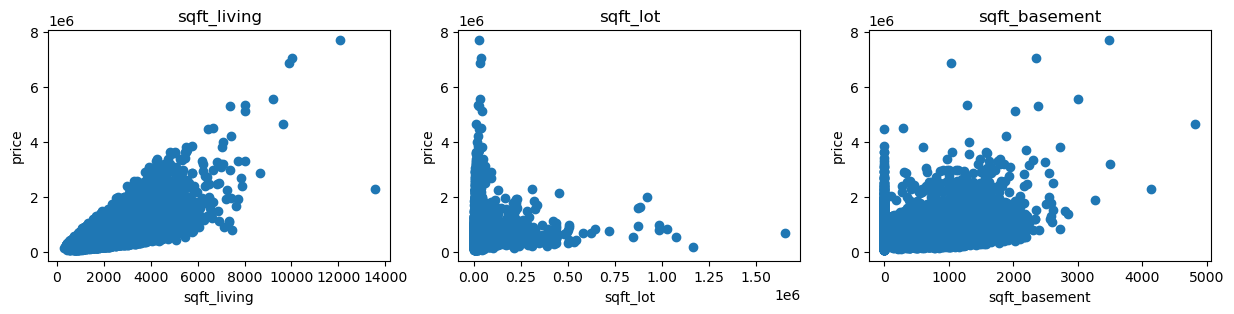

In [16]:
predictor=df[['sqft_living', 'sqft_lot','sqft_basement' ]]

plt.figure(figsize=(15, 3))


for i, col in enumerate(predictor.columns):
    plt.subplot(1, 3, i+1)
    x = predictor[col]
    y = df.price
    plt.plot(x, y, 'o')

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [17]:
df['log_price'] = np.log(df['price'])


In [18]:
df['log_sqft_living'] = np.log(df['sqft_living'])


In [19]:
df['log_sqft_lot'] = np.log(df['sqft_lot'])


In [20]:
df['log_sqft_basement'] = np.log(df['sqft_basement']+1) #+1 to avoid log(0)

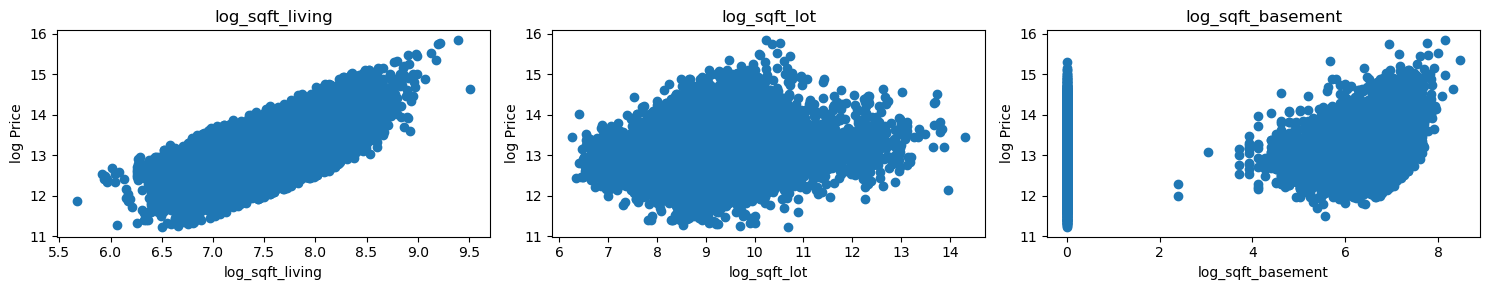

In [21]:
predictor=df[['log_sqft_living', 'log_sqft_lot','log_sqft_basement' ]]

plt.figure(figsize=(15, 3))

for i, col in enumerate(predictor.columns):
    plt.subplot(1, 3, i+1)
    x = predictor[col]
    y = df.log_price
    plt.plot(x, y, 'o')
    plt.tight_layout()


    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('log Price')

Generally speaking, normality and nonlinearity are harder to improve, but the same time a smaller problem that we need to worry about. We can always try log transformations and scale the predictors, that should be sufficient. 